## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [59]:
# import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [60]:
# Your code here - remember to use markdown cells for comments as well!
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.9)


In [61]:
import os,glob
# display(os.listdir('zippedData'))


files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [62]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [63]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [64]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)#,index_col=0)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


# Preview Data

## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [65]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    try:
        display(data.head(2).style.set_caption(f"{tablename}"))
        print(len(data))
    except:
        display(data.head(2).reset_index().style.set_caption(f"{tablename}"))
    print()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"


146144



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


26517



,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0


331703



,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


73856



,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


606648



,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


54432



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"


146144



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


1560



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


5782



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010


3387



,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan


1028186



## New Attempt (06/02)

### Using imdb.title.basics & imdb.title.ratings


In [66]:
# df0 = DATA['imdb.']

#### Prepping imdb.title.basics

In [67]:
df1 = DATA['imdb.title.basics'].copy()
display(df1.head(),df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


None

In [68]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [69]:
df1[df1['runtime_minutes'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [70]:
df1.dropna(subset=['runtime_minutes'],inplace=True)
df1.isna().sum()

tconst                0
primary_title         0
original_title        4
start_year            0
runtime_minutes       0
genres             2172
dtype: int64

In [71]:
df1[df1['genres'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,tt0306058,Second Coming,Second Coming,2012,95.0,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN
45,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,NaN
398,tt0877604,Chûshingura,Chûshingura,2016,76.0,NaN
...,...,...,...,...,...,...
146086,tt9906844,Footloose in England's Lake District,Footloose in England's Lake District,2017,150.0,NaN
146087,tt9907032,Footloose in London II: 2 Undiscovered and Unu...,Footloose in London II: 2 Undiscovered and Unu...,2018,124.0,NaN
146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,NaN
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,NaN


In [72]:
df1['genres'].fillna('MISSING',inplace=True)

In [73]:
print(df1.isna().sum())
df1.dropna(inplace=True)
print(df1.isna().sum())

tconst             0
primary_title      0
original_title     4
start_year         0
runtime_minutes    0
genres             0
dtype: int64
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114401 entries, 0 to 146142
Data columns (total 6 columns):
tconst             114401 non-null object
primary_title      114401 non-null object
original_title     114401 non-null object
start_year         114401 non-null int64
runtime_minutes    114401 non-null float64
genres             114401 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [75]:
## Getting only 2010-2020 movies
df1 = df1[(df1['start_year'] >= 2010) & (df1['start_year'] <2021)]
df1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama


#### Prepping imdb.title.ratings

In [76]:
df2 = DATA['imdb.title.ratings']

display(df2.head(),df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


None

In [77]:
display(df1.isna().sum(),df2.isna().sum())
display(df1.nunique(),df2.nunique())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64

tconst             114394
primary_title      107449
original_title     108908
start_year             11
runtime_minutes       367
genres               1041
dtype: int64

tconst           73856
averagerating       91
numvotes          7349
dtype: int64

In [78]:
df = pd.merge(df1,df2,on='tconst',how='left')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
114389,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
114390,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
114391,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN
114392,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN


In [79]:
df.isna().sum()/len(df)

tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
averagerating      0.420984
numvotes           0.420984
dtype: float64

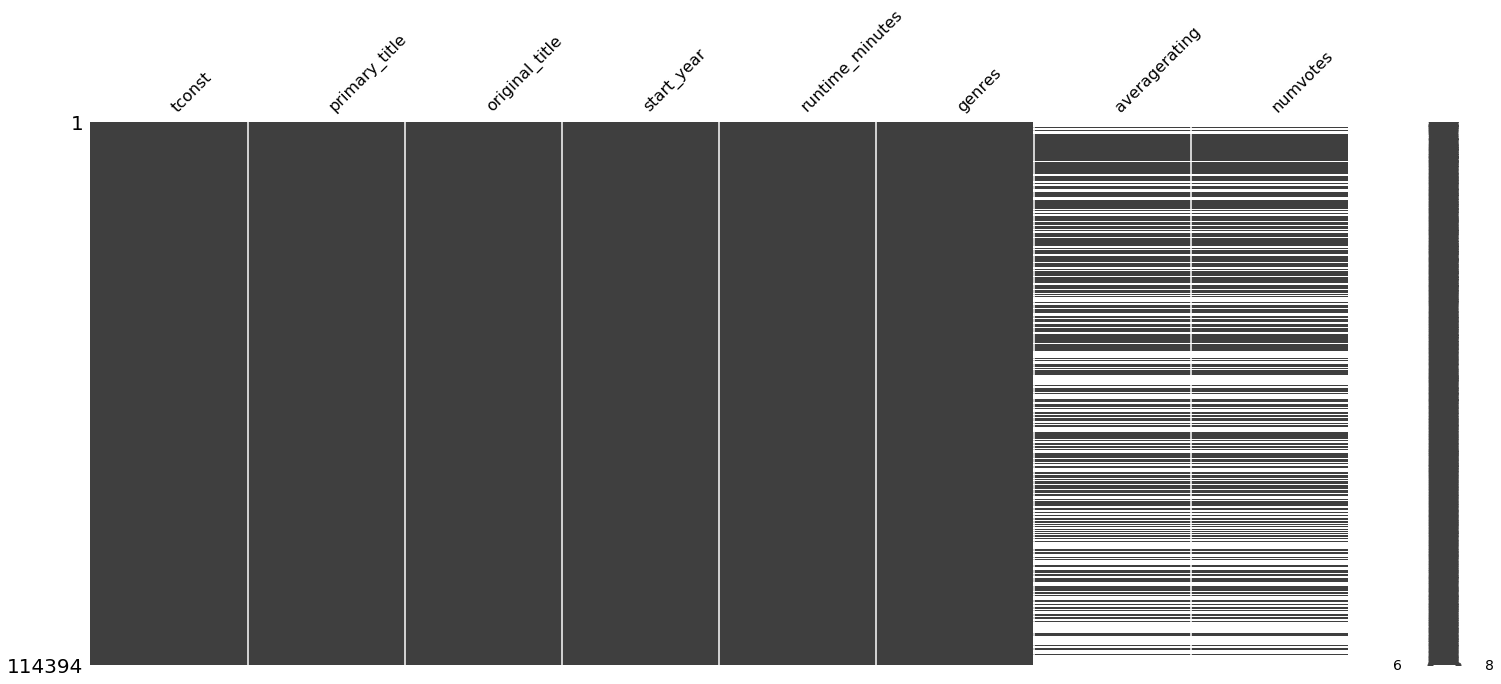

In [80]:
import missingno as ms
ms.matrix(df)

In [81]:
df[df['averagerating'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
6,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,NaN
20,tt0262759,Seven Jews from My Class,Siedmiu Zydów z mojej klasy,2018,40.0,Documentary,NaN,NaN
27,tt0311448,Lives No Longer Ours,Lives No Longer Ours,2011,90.0,"Drama,Romance",NaN,NaN
47,tt0368133,The Promise of Perfume,The Promise of Perfume,2017,57.0,Documentary,NaN,NaN
...,...,...,...,...,...,...,...,...
114389,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
114390,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
114391,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN
114392,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN


In [82]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN


In [83]:
df[df.duplicated(subset=['tconst'],keep=False)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


### Must deal with duplicates later

In [84]:
df[df.duplicated(subset=['primary_title'],keep=False)].sort_values('primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
85519,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",NaN,NaN
87359,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",NaN,NaN
34839,tt2518788,1,1,2013,112.0,"Documentary,History,Sport",8.0,3452.0
83097,tt5891614,1,1,2016,22.0,Documentary,NaN,NaN
16342,tt1859618,1,1,2019,100.0,Drama,9.2,13.0
...,...,...,...,...,...,...,...,...
55781,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",NaN,NaN
55785,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",NaN,NaN
55780,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",NaN,NaN
19042,tt1961689,Éden,Éden,2011,64.0,Documentary,7.1,8.0


###  📕BOOKMARK Figure out how to join with budgets/revenue

- either tn.movie_budgets or bom.movie_gross

In [85]:
display(DATA['tn.movie_budgets'].head(),DATA['bom.movie_gross'].head())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [86]:
df3 = DATA['tn.movie_budgets']
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [87]:
df3['release_datetime'] = pd.to_datetime(df3['release_date'])
df3['datetime_year'] = df3['release_datetime'].dt.year
df3 = df3[(df3['datetime_year'] >= 2010) & (df3['datetime_year'] < 2021)]
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_datetime,datetime_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18,2015
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,2014-12-31,2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,2015-05-19,2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012-01-13,2012
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018-12-31,2018


In [88]:
df3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_datetime     0
datetime_year        0
dtype: int64

In [89]:
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
...,...,...,...,...,...,...,...,...
114389,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,NaN,NaN
114390,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
114391,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",NaN,NaN
114392,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN


### Merging revenue attempt 1

In [90]:
DF_tn = pd.merge(df,df3,left_on='primary_title',right_on='movie',how='inner')
DF_tn

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_datetime,datetime_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012-12-31,2012
1,tt0326592,The Overnight,The Overnight,2010,88.0,MISSING,7.5,24.0,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",2015-06-19,2015
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",2015-06-19,2015
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",2013-03-22,2013
4,tt2404548,On the Road,On the Road,2011,90.0,Drama,NaN,NaN,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302",2013-03-22,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724.0,8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",2018-07-20,2018
2389,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",Happy Death Day 2U,"$9,000,000","$28,051,045","$64,179,495",2019-02-13,2019
2390,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019-08-14,2019
2391,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",2018-09-21,2018


- Lost a lot of rows with an inner join, if I use bom_gross is it any better?

In [91]:
df4 = DATA['bom.movie_gross']
df4

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [92]:
df4 = df4[(df4['year'] >= 2010) & (df4['year'] < 2021)]
df4

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [93]:
DF_bom = pd.merge(df,df4,left_on='primary_title',right_on='title',how='inner')
DF_bom

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6.0,On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147.0,The Chambermaid,FM,300.0,NaN,2015
3194,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607.0,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3195,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673.0,Helicopter Eela,Eros,72000.0,NaN,2018
3196,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322.0,Last Letter,CL,181000.0,NaN,2018


In [94]:
DF_bom.isna().sum()/len(DF_bom)

tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
averagerating      0.068168
numvotes           0.068168
title              0.000000
studio             0.000938
domestic_gross     0.007192
foreign_gross      0.398061
year               0.000000
dtype: float64

In [95]:
DF_tn.isna().sum()/len(DF_tn)

tconst               0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      0.000000
genres               0.000000
averagerating        0.099875
numvotes             0.099875
id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
release_datetime     0.000000
datetime_year        0.000000
dtype: float64

In [98]:
len(DF_bom),len(DF_tn)

(3198, 2393)

In [106]:
print(f"[i]DF_bom has:\n\t-{len(DF_bom)} movies.")
print(f"Null Values:")
display(DF_bom.isna().sum())
print(f"Total if drop null values: {len(DF_bom.dropna(subset=['domestic_gross']))}")


print('\n'*3)
print(f"[i]DF_tn has:\n\t-{len(DF_tn)} movies.")
print(f"Null Values:")
display(DF_tn.isna().sum())
print(f"Total if drop null values: {len(DF_tn.dropna(subset=['domestic_gross']))}")



[i]DF_bom has:
	-3198 movies.
Null Values:


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating       218
numvotes            218
title                 0
studio                3
domestic_gross       23
foreign_gross      1273
year                  0
dtype: int64

Total if drop null values: 3175




[i]DF_tn has:
	-2393 movies.
Null Values:


tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating        239
numvotes             239
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
release_datetime       0
datetime_year          0
dtype: int64

Total if drop null values: 2393


In [107]:
unmatched_tn = DF_tn[DF_tn['domestic_gross'].isna()]
unmatched_tn

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_datetime,datetime_year


In [108]:
unmatched_bom = DF_bom[DF_bom['domestic_gross'].isna()]
unmatched_bom

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
299,tt1167638,22 Bullets,L'immortel,2010,117.0,"Action,Crime,Drama",6.7,30360.0,22 Bullets,Cdgm.,NaN,21300000,2013
308,tt1179069,6 Souls,6 Souls,2010,112.0,"Horror,Mystery,Thriller",6.1,30389.0,6 Souls,RTWC,NaN,852000,2013
311,tt1181840,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",7.0,5494.0,Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
439,tt1291570,Solace,Solace,2015,101.0,"Crime,Drama,Mystery",6.4,49417.0,Solace,LGP,NaN,22400000,2016
440,tt2140411,Solace,Solace,2013,76.0,Thriller,7.2,59.0,Solace,LGP,NaN,22400000,2016
441,tt3240102,Solace,Solace,2018,81.0,Drama,4.9,28.0,Solace,LGP,NaN,22400000,2016
442,tt6687810,Solace,Solace,2017,66.0,Drama,NaN,NaN,Solace,LGP,NaN,22400000,2016
481,tt1319716,It's a Wonderful Afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",5.4,1361.0,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
697,tt1442571,14 Blades,Jin yi wei,2010,114.0,"Action,History,Thriller",6.4,7100.0,14 Blades,RTWC,NaN,3800000,2014
798,tt1507563,Dark Tide,Dark Tide,2012,94.0,"Action,Adventure,Drama",4.3,7682.0,Dark Tide,WHE,NaN,432000,2012


In [109]:
DF = DF_bom.dropna(subset=['domestic_gross']).copy()
DF

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6.0,On the Road,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147.0,The Chambermaid,FM,300.0,NaN,2015
3194,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607.0,How Long Will I Love U,WGUSA,747000.0,82100000,2018
3195,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673.0,Helicopter Eela,Eros,72000.0,NaN,2018
3196,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322.0,Last Letter,CL,181000.0,NaN,2018


In [111]:
## IO cell
#DF.to_csv('movies_df_imdb_bom.csv',index=False)

# DF = pd.read_csv('movies_df_imdb_bom.csv')
DF.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,744000.0,8000000,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,NaN,NaN,On the Road,IFC,744000.0,8000000,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6.0,On the Road,IFC,744000.0,8000000,2012


## Join rt.movie_info (`dfrt`) & ~~tn.movie_budgets (`tn_budgets`)~~ DF

In [121]:
# dfrt = DATA['rt.movie_info.'].copy()
# dfrt['date_index'] = pd.to_datetime(dfrt['theater_date'])
# dfrt
# # dfrt[(dfrt['date_index']>='2010')]# & (dfrt['date_index']<'2020')]

In [113]:

dfrt = dfrt[(dfrt['date_index'] >
dfrt.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,date_index
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971-10-09
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012-08-17
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996-09-13


In [ ]:
tn_budgets = DATA['tn.movie_budgets'].copy()
tn_budgets.head()

### Make df1

In [ ]:
## Make indices as datetime to test merge
left ='theater_date'
right = 'release_date'

rt_index = pd.to_datetime(dfrt[left])
tn_index = pd.to_datetime(tn_budgets[right])

dfrt['index'] = rt_index.copy()
tn_budgets['index'] = tn_index.copy()

## Merge idex 
df1= pd.merge(dfrt,tn_budgets, on='index')
df1

In [ ]:
## ADDRESS NUMERIC COLUMNS TO CONVERT
df1['runtime'] = df1['runtime'].str.replace(' minutes','').astype(float)

## Fix Currency
num_cols = ['production_budget','domestic_gross','worldwide_gross']
for col in num_cols:
    df1[col] = pd.to_numeric(df1[col].apply(lambda x: x.replace('$','').replace(',','')))#,errors='coerce')

In [ ]:
def column_report(df1,styled=False,cmap='Reds'):
    """Returns a report of the dtypes, num null, % null, and num of unique values
    """
    report = pd.DataFrame(index=df1.columns)

    report['dtype']=df1.dtypes

    report['num_null'] = df1.isna().sum()
    report['% null'] = round(df1.isna().sum()/len(df1)*100,2)

    report['nunique'] = df1.nunique()
    
    if styled:
        s = report.style.bar('% null').background_gradient(subset=['nunique'],
                                                           cmap=cmap)
        display(s)
    else:
        return report#.style.background_gradient(subset=['num_null'],cmap='Reds')


column_report(df1,True)#.style.bar('% null').background_gradient(subset=['nunique'],

In [ ]:
plt.style.use('seaborn-talk')

In [ ]:
import missingno as ms
ms.matrix(df1)

In [ ]:
df1.plot(kind='scatter',x='production_budget',y='domestic_gross')

In [ ]:
rating_domestic = df1.groupby('rating').sum()['domestic_gross']#.plot(kind='barh')
rating_domestic.plot(kind='barh')

### Cleaning `runtime` to num

In [ ]:
df1

In [ ]:
df1.head()


In [ ]:
df1['movie']

### Plotly Express

In [ ]:
## Visua
import plotly.express as px
px.scatter(df1,y='domestic_gross',x='production_budget',hover_name='movie',
           hover_data=['domestic_gross','production_budget'],
       color='rating',trendline='ols')
# px.scatter(df1,y='domestic_gross',
#          x='rating',
#          color='rating')#

In [ ]:
import plotly.express as px
# px.scatter(df1,y='domestic_gross',x='runtime',hover_name='movie',
#            hover_data=['domestic_gross','production_budget'],
#        color='rating',trendline='ols')
# # px.scatter(df1,y='domestic_gross',
# #          x='rating',
# #          color='rating')#

In [ ]:
fg = sns.catplot(data=df1,x='rating',y='domestic_gross')

## Formatting $Millions

In [ ]:
def millions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.0fM' % (x * 1e-6)

formatter = mpl.ticker.FuncFormatter(millions)

In [ ]:
df1['domestic_gross'].describe()

In [ ]:
sns.boxplot(data=df1,x='rating',y='domestic_gross')

In [ ]:
sns.swarmplot(data=df1,x='rating',y='domestic_gross')

In [ ]:
ax = sns.barplot(data=df1,x='rating',y='domestic_gross',ci=68)
ax.yaxis.set_major_formatter(formatter)

In [ ]:
sns.swarmplot(data=df1,x='rating',y='domestic_gross')#,ci=68)

In [ ]:
sns.distplot(df1.groupby('rating').get_group('R')[ 'domestic_gross'])

In [ ]:
DATA['tn.movie_budgets']

## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [ ]:
# keys = list(DATA.keys())

KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}

In [ ]:
DATA['imdb.title.principals']

In [ ]:
unique_tconst = {}
for table_name,key_col in KEY_COLS.items():
    table = DATA[table_name]
    print(table_name)
#     print(key_col)

    if 'tconst' in key_col:
        print(key_col)
        print()

        unique_tconst[table_name] = table[key_col].unique()
    else:
        print('N/A')
        
    print()


In [ ]:
unique_tconst

In [ ]:
[len(v) for x,v in unique_tconst.items()]

In [ ]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

In [ ]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

In [ ]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

In [ ]:
[DATA[x].shape for x in non_matching_key_cols] 

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [ ]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

In [ ]:
df_imdb

In [ ]:
DATA['imdb.title.ratings']

In [ ]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

In [ ]:
df.info()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
scatmat = pd.plotting.scatter_matrix(df);

In [ ]:
import missingno as ms
ms.matrix(df)

In [ ]:
df[df['runtime_minutes'].isna()].isna().sum()

In [ ]:
rated = df[df['averagerating'].notnull()].copy()
rated

In [ ]:
scatmat = pd.plotting.scatter_matrix(rated);

In [ ]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [ ]:
import scipy.stats as st

rated['runtime_minutes']

In [ ]:
rated.isna().sum()/len(rated)

In [ ]:
rated.dropna(inplace=True)

In [ ]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

In [ ]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
rated['outlier'] = idx_outs

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [ ]:
# stop

# Joining dfrt (gross) + df_imdb

In [ ]:
dfrt.head()

In [ ]:
df.head()

# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [ ]:
stop

In [ ]:
df = DATA['tn.movie_budgets']
df

In [ ]:
df['movie']

In [ ]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [ ]:
resp = get_mdb_api('Dark Phoenix')

In [ ]:
make_records_df(resp)

### Testing with 1 Movie

In [ ]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

In [ ]:
test = get_mdb_api(test_movie['movie'])
test

In [ ]:
resp = test.json()
resp

In [ ]:
resp.keys()

In [ ]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

In [ ]:
test_movie.T[0]

In [ ]:
test_movie['movie']

In [ ]:
res_df['Title']

In [ ]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

In [ ]:
test_movie